Use kernel: Python 3 (ipykernel)

In [1]:
conda env list


# conda environments:
#
base                   /opt/anaconda3
HuggingFaceBook      * /opt/anaconda3/envs/HuggingFaceBook
islp                   /opt/anaconda3/envs/islp
py313                  /opt/anaconda3/envs/py313
python-ds-ml-bootcamp   /opt/anaconda3/envs/python-ds-ml-bootcamp


Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import AutoTokenizer

In [3]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [4]:
input_text = "What is unhappiness?"

In [5]:
tokens = tokenizer(input_text, return_tensors="pt")

In [6]:
print(tokens)

['what', 'is', 'un', '##ha', '##pp', '##iness', '?']


In [2]:
from transformers import BertTokenizer, BertModel
import torch
 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
 
input_text = '''
After a long day at work, Sarah decided to relax by taking her 
dog for a walk in the park. As they strolled along the 
tree-lined paths, Sarah's dog, Max, eagerly sniffed around, 
chasing after squirrels and birds. Sarah smiled as she watched 
Max enjoy himself, feeling grateful for the companionship and 
joy that her furry friend brought into her life.'''
 
tokens = tokenizer(input_text, return_tensors="pt")
 
with torch.no_grad():
    outputs = model(**tokens)
 
last_hidden_states = outputs.last_hidden_state
print("Token embeddings:")
for token, embedding in zip(tokens["input_ids"][0], 
                            last_hidden_states[0]):
    word = tokenizer.decode(int(token))
    # print(f"{word}: {embedding}")
    print(f"{token}, {word}")

Token embeddings:
101, [CLS]
2044, after
1037, a
2146, long
2154, day
2012, at
2147, work
1010, ,
4532, sarah
2787, decided
2000, to
9483, relax
2011, by
2635, taking
2014, her
3899, dog
2005, for
1037, a
3328, walk
1999, in
1996, the
2380, park
1012, .
2004, as
2027, they
20354, strolled
2247, along
1996, the
3392, tree
1011, -
7732, lined
10425, paths
1010, ,
4532, sarah
1005, '
1055, s
3899, dog
1010, ,
4098, max
1010, ,
17858, eagerly
18013, sniffed
2105, around
1010, ,
11777, chasing
2044, after
29384, squirrels
1998, and
5055, birds
1012, .
4532, sarah
3281, smiled
2004, as
2016, she
3427, watched
4098, max
5959, enjoy
2370, himself
1010, ,
3110, feeling
8794, grateful
2005, for
1996, the
11946, companions
5605, ##hip
1998, and
6569, joy
2008, that
2014, her
28662, furry
2767, friend
2716, brought
2046, into
2014, her
2166, life
1012, .
102, [SEP]


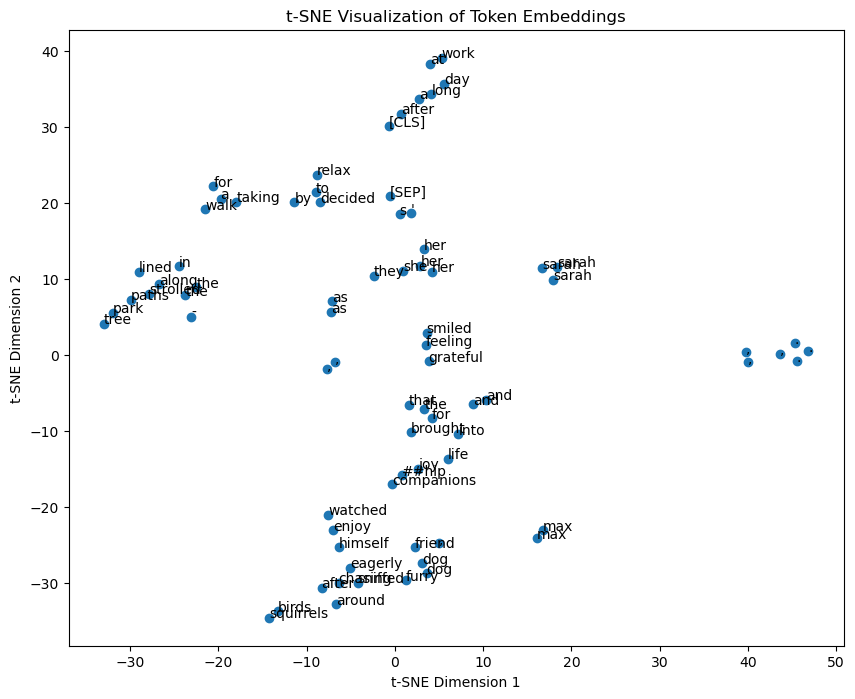

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
 
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_tsne = tsne.fit_transform(last_hidden_states[0])
 
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[:, 0],
            embeddings_tsne[:, 1], marker='o')
for i, word in enumerate(tokenizer.convert_ids_to_tokens(
    tokens["input_ids"][0])):
    plt.annotate(word, xy=(embeddings_tsne[i, 0],
                           embeddings_tsne[i, 1]),
                 fontsize=10)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Token Embeddings')
plt.show()


## Positional encoding

In [72]:
from transformers import BertTokenizer, BertModel
import torch
 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
 
input_text = '''
After a long day at work, Sarah decided to relax by taking her 
dog for a walk in the park. As they strolled along the 
tree-lined paths, Sarah's dog, Max, eagerly sniffed around, 
chasing after squirrels and birds. Sarah smiled as she watched 
Max enjoy himself, feeling grateful for the companionship and 
joy that her furry friend brought into her life.'''
 
tokens = tokenizer(input_text, return_tensors="pt")
embeddings = model.embeddings
print(embeddings)
positional_embeddings = embeddings.position_embeddings.weight
position_ids = torch.arange(tokens['input_ids'].size(1), 
                            dtype=torch.long).unsqueeze(0)
input_positional_embeddings = positional_embeddings[position_ids]
 
print("Positional embeddings shape:", input_positional_embeddings.shape)
# print(input_positional_embeddings)
print("Positional embeddings for each token:")
 
for token_id, pos_embedding in zip(tokens['input_ids'][0], 
                                   input_positional_embeddings[0]):
    token = tokenizer.decode([token_id])
    # print(f"{token}: {pos_embedding}")
    print(f"{token_id}, {token}")

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
Positional embeddings shape: torch.Size([1, 77, 768])
Positional embeddings for each token:
101, [CLS]
2044, after
1037, a
2146, long
2154, day
2012, at
2147, work
1010, ,
4532, sarah
2787, decided
2000, to
9483, relax
2011, by
2635, taking
2014, her
3899, dog
2005, for
1037, a
3328, walk
1999, in
1996, the
2380, park
1012, .
2004, as
2027, they
20354, strolled
2247, along
1996, the
3392, tree
1011, -
7732, lined
10425, paths
1010, ,
4532, sarah
1005, '
1055, s
3899, dog
1010, ,
4098, max
1010, ,
17858, eagerly
18013, sniffed
2105, around
1010, ,
11777, chasing
2044, after
29384, squirrels
1998, and
5055, birds
1012, .
4532, sarah
3281, smiled
2004, as
2016, she
3427, watched
4098, max
5959, enjoy
2370, himself
1

https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

## Sentiment Analysis

In [7]:
from transformers import AutoTokenizer
 
tokenizer = AutoTokenizer.from_pretrained(
    "distilbert/distilbert-base-uncased-finetuned-sst-2-english")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [8]:
from transformers import AutoModelForSequenceClassification
 
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased-finetuned-sst-2-english")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [37]:
import torch
 
text = "I loved the movie, it was fantastic!"
 
inputs = tokenizer(text, return_tensors = "pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  3866,  1996,  3185,  1010,  2009,  2001, 10392,   999,
           102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [55]:
import numpy as np
import pandas as pd
# copy vocab.txt to new location, open with Excel and save as tab delimited text
vocab = pd.read_csv('vocab-tab-delimited.txt', sep=" ", header=None)

In [56]:
# found words in vocab.txt file listed in token order
for n in [ 101,  1045,  3866,  1996,  3185,  1010,  2009,  2001, 10392, 999, 102]:
    print("token: ", n, ", word:", vocab.iloc[(n - 1),0])

token:  101 , word: [UNK]
token:  1045 , word: i
token:  3866 , word: loved
token:  1996 , word: the
token:  3185 , word: movie
token:  1010 , word: ,
token:  2009 , word: it
token:  2001 , word: was
token:  10392 , word: fantastic
token:  999 , word: [unused993]
token:  102 , word: [CLS]


In [57]:
outputs = model(**inputs)
print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-4.3428,  4.6955]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


### Logits
In the context of machine learning and deep learning, the term "logits" is commonly used to refer to the raw, unnormalized scores or outputs generated by the final layer of a neural network before any normalization function like softmax is applied.
 These raw values are not probabilities but are used as inputs to functions like softmax, which converts them into a probability distribution over the possible classes.
 The term is sometimes considered a misnomer because it refers to the output values rather than the mathematical logit function itself, creating a common point of confusion

In [59]:

predicted_label = torch.argmax(outputs.logits)
sentiment = "positive" if predicted_label == 1 else "negative"
 
print("Predicted sentiment:", sentiment)

Predicted sentiment: positive


In [60]:
import torch.nn.functional as F

In [68]:
probabilities = F.softmax(outputs.logits, dim=1)
probabilities

tensor([[1.1876e-04, 9.9988e-01]], grad_fn=<SoftmaxBackward0>)

## Using Transformer Pipelines (instead of directly)

In [73]:
# find the available tasks by asking for a non-existent task
from transformers import pipeline
try:
    dummy_pipeline = pipeline(task="dummy")
except Exception as e:
    print(e)

"Unknown task dummy, available tasks are ['audio-classification', 'automatic-speech-recognition', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-text-to-text', 'image-to-image', 'image-to-text', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text-to-audio', 'text-to-speech', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection', 'translation_XX_to_YY']"


In [75]:
# use default model, not recommended
# pipe = pipeline("text-classification")

In [76]:
from transformers import pipeline
 
classifier = pipeline(task = 'text-classification',
    model = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english')

Device set to use mps:0


In [77]:
review1 = '''From the warm welcome to the exquisite dishes and impeccable
 service, dining at Gourmet Haven is an unforgettable experience that
 leaves you eager to return.'''
 
review2 = '''Despite high expectations, our experience at Savor Bistro 
 fell short; the food was bland, service was slow, and the overall
 atmosphere lacked charm, leaving us disappointed and unlikely to
 revisit.'''

In [78]:
print(classifier(review1))

[{'label': 'POSITIVE', 'score': 0.9998437166213989}]


In [79]:
print(classifier([review1, review2]))

[{'label': 'POSITIVE', 'score': 0.9998437166213989}, {'label': 'NEGATIVE', 'score': 0.9997773766517639}]


## Transformers for NLP Tasks
### Text Classification

In [80]:
from transformers import pipeline
 
question_classifier = pipeline("text-classification", model="huaen/question_detection")

config.json:   0%|          | 0.00/853 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use mps:0


In [83]:
response = question_classifier('''Have you ever pondered the mysteries that lie beneath the surface of everyday life?''')
print(response)

[{'label': 'question', 'score': 0.9975988268852234}]


In [84]:
response = question_classifier(
    '''"Life is a journey that must be traveled, no matter 
    how bad the roads and accommodations." - Oliver Goldsmith''')
print(response)

[{'label': 'non_question', 'score': 0.9996856451034546}]


In [85]:
language_classifier = pipeline("text-classification", 
    model="papluca/xlm-roberta-base-language-detection")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use mps:0


[{'label': 'ja', 'score': 0.9913387298583984}]


In [86]:
response = language_classifier("日本の桜は美しいです。")
print(response)

[{'label': 'ja', 'score': 0.9913387298583984}]


In [87]:
spam_classifier = pipeline("text-classification", 
                           model="Delphia/twitter-spam-classifier")

config.json:   0%|          | 0.00/860 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

Device set to use mps:0


"Device set to use mps:0" indicates that a computational device, specifically a Metal Performance Shaders (MPS) device, is being utilized for operations, often in the context of machine learning frameworks like PyTorch.
Explanation:
MPS (Metal Performance Shaders):
This is a framework developed by Apple that enables high-performance computations on Apple Silicon Macs and Macs with AMD GPUs. It provides optimized kernels for common machine learning operations.
mps:0:
This specifies the first available MPS device. If multiple MPS-enabled GPUs were present, they might be referred to as mps:1, mps:2, etc.


In [88]:
response = spam_classifier(
    '''Congratulations! You've been selected as the winner of our 
    exclusive prize draw. Claim your reward now by clicking on 
    the link below!''')
 
print(response)

[{'label': 1, 'score': 0.7446917295455933}]


In [89]:
response = spam_classifier(
    '''Hi Jimmy, I hope you're doing well. I just wanted to remind 
    you about our meeting tomorrow at 10 AM in conference room A. 
    Please let me know if you have any questions or need any 
    further information. Looking forward to seeing you there!''')
 
print(response)

[{'label': 0, 'score': 0.77765291929245}]


### Text generation

In [90]:
from transformers import pipeline
 
generator = pipeline("text-generation", 
                     model="openai-community/gpt2")
generator("In this course, we will teach you how to")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use the JavaFX API to create a web application.\n\nExample: Creating a website\n\nFirst, let\'s create a website using Java 8. First, let\'s define the basic code for the page, which will be displayed in the browser:\n\nvar pages = { "title": "Java 8 Web Application", "content": { "url": "/", "url_encoding": "utf8", "url_string": "html", "title": "Java 8 Website", "content": { "url": "/", "url_encoding": "utf8", "url_string": "html", "title": "Java 8 Website", "content": { "url": "/", "url_encoding": "utf8", "url_string": "html", "title": "Java 8 Website", "content": { "url": "/", "url_encoding": "utf8", "url_string": "html", "title": "Java 8 Website", "content": { "url": "/", "url_encoding": "utf8", "url_string": "html", "title": "Java 8 Website", "content": { "url": "/", "url_encoding":'}]

In [93]:
generator("In this course, we will teach you how to", 
          max_length = 50, 
          max_new_tokens = 50,
          truncation=True,
          num_return_sequences = 3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=50) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this course, we will teach you how to create and maintain a secure and reliable database at a fraction of the cost.\n\nAll of this can be done at the same time using the free, open source version of MySQL, and you can download it from the MySQL Help Center.\n\n'},
 {'generated_text': 'In this course, we will teach you how to write with an API-compatible JavaScript. You will use it to create the API-compatible code that you need to run your application on your platform.\n\nOur demo app was made available as a download for free. All you need to do to'},
 {'generated_text': 'In this course, we will teach you how to build a simple web app using AngularJS.\n\nThis course is designed to teach you how to build a simple web app using AngularJS.\n\nIf you want to learn more about AngularJS, here are some great resources:\n\nAng'}]

### Text summarization

In [94]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use mps:0


In [95]:
article = """ 
A quantum computer is a computer that exploits quantum mechanical 
phenomena. At small scales, physical matter exhibits properties of 
both particles and waves, and quantum computing leverages this 
behavior using specialized hardware. Classical physics cannot 
explain the operation of these quantum devices, and a scalable 
quantum computer could perform some calculations exponentially 
faster than any modern "classical" computer. In particular, a 
large-scale quantum computer could break widely used encryption 
schemes and aid physicists in performing physical simulations; 
however, the current state of the art is still largely 
experimental and impractical.
 
The basic unit of information in quantum computing is the qubit, 
similar to the bit in traditional digital electronics. Unlike a 
classical bit, a qubit can exist in a superposition of its two 
"basis" states, which loosely means that it is in both states 
simultaneously. When measuring a qubit, the result is a 
probabilistic output of a classical bit. If a quantum computer 
manipulates the qubit in a particular way, wave interference 
effects can amplify the desired measurement results. The design 
of quantum algorithms involves creating procedures that allow a 
quantum computer to perform calculations efficiently.
 
Physically engineering high-quality qubits has proven challenging. 
If a physical qubit is not sufficiently isolated from its 
environment, it suffers from quantum decoherence, introducing noise 
into calculations. National governments have invested heavily in 
experimental research that aims to develop scalable qubits with 
longer coherence times and lower error rates. Two of the most 
promising technologies are superconductors (which isolate an 
electrical current by eliminating electrical resistance) and ion 
traps (which confine a single atomic particle using electromagnetic 
fields).
 
Any computational problem that can be solved by a classical computer 
can also be solved by a quantum computer.[2] Conversely, any problem 
that can be solved by a quantum computer can also be solved by a 
classical computer, at least in principle given enough time. In other 
words, quantum computers obey the Church–Turing thesis. This means 
that while quantum computers provide no additional advantages over 
classical computers in terms of computability, quantum algorithms 
for certain problems have significantly lower time complexities than 
corresponding known classical algorithms. Notably, quantum computers 
are believed to be able to solve certain problems quickly that no 
classical computer could solve in any feasible amount of time—a feat 
known as "quantum supremacy." The study of the computational 
complexity of problems with respect to quantum computers is known as 
quantum complexity theory.
"""
 
print(summarizer(article, 
                 min_length = 100, 
                 max_length = 250,
                 do_sample = False))  # extractive summarization

[{'summary_text': 'A quantum computer is a computer that exploits quantum mechanical phenomena. Classical physics cannot explain the operation of these quantum devices. A large-scale quantum computer could break widely used encryption. The basic unit of information in quantum computing is the qubit, similar to the bit in traditional digital electronics. The design of quantum algorithms involves creating procedures that allow a quantum computer to perform calculations efficiently. Any computational problem that can be solved by a classical computer can also be problems solved by quantum computers. quantum computers obey the Church–Turing thesis.'}]


In [96]:
print(summarizer(article, 
                 min_length = 100, 
                 max_length = 250,
                 do_sample = True))  # abstractive summarization

[{'summary_text': 'A quantum computer is a computer that exploits quantum mechanical phenomena. Classical physics cannot explain the operation of these quantum devices. A large-scale quantum computer could break widely used encryption. The basic unit of information in quantum computing is the qubit, similar to the bit in traditional digital electronics. Any computational problem that can be solved by a classical computer can also be solve by a quantum computer. quantum computers are believed to be able to solve certain problems quickly that no classical computer could solve in any feasible amount of time.'}]


### Text (Language) translation

In [115]:
from transformers import pipeline
 
translator = pipeline("translation", model = "google-t5/t5-base")

Device set to use mps:0


In [116]:
translator("How are you?")

[{'translation_text': 'Wie sind Sie?'}]

In [117]:
translator = pipeline(task = 'translation_en_to_fr', 
                      model = "google-t5/t5-base")
translator('Wikipedia is hosted by the Wikimedia Foundation, a non-profit organization that also hosts a range of other projects.')

Device set to use mps:0


[{'translation_text': "Wikipedia est hébergée par la Wikimedia Foundation, un organisme sans but lucratif qui héberge également une série d'autres projets."}]

In [118]:
translator = pipeline(task = 'translation_en_to_de', 
                      model = "google-t5/t5-base")
german_result = translator('Wikipedia is hosted by the Wikimedia Foundation, a non-profit organization that also hosts a range of other projects.')

Device set to use mps:0


In [119]:
german_text = german_result[0]['translation_text']
print(len(german_text.split(' ')))
german_text

17


'Wikipedia wird von der Wikimedia Foundation gehostet, einer gemeinnützigen Organisation, die auch eine Reihe anderer Projekte beherbergt.'

In [14]:
# de => en doesn't work
translator = pipeline(task = 'translation_de_to_en', model = "google-t5/t5-base", max_length=400)
translator(german_text)

Device set to use mps:0


NameError: name 'german_text' is not defined

### Zero-shot classification

Zero-shot classification is the task of classifying previously unseen classes during training of a model, while one-shot classification refers to the technique where a model is trained to recognize classes with only one example (or just a few examples) per class during training.

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()

In [112]:
# restart kernel after installing?
# !pip install sentencepiece
# !pip install protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.7 MB/s eta 0:00:00


In [1]:
conda env list


# conda environments:
#
base                   /opt/anaconda3
HuggingFaceBook      * /opt/anaconda3/envs/HuggingFaceBook
islp                   /opt/anaconda3/envs/islp
py313                  /opt/anaconda3/envs/py313
python-ds-ml-bootcamp   /opt/anaconda3/envs/python-ds-ml-bootcamp


Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline
 
zero_shot_classifier = pipeline("zero-shot-classification",  
                                model='joeddav/xlm-roberta-large-xnli')

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


In [3]:
text1 = '''
"In the intricate realm of global affairs, the interplay of power, 
diplomacy, and governance stands as a defining force in the 
trajectory of nations. Amidst fervent debates in legislative 
chambers and pivotal dialogues among world leaders, ideologies 
clash and policies take shape, shaping the course of societies. 
Issues such as economic disparity, environmental stewardship, and 
human rights take precedence, driving conversations and shaping 
public sentiment. In an age of digital interconnectedness, social 
media platforms have emerged as influential channels for discourse 
and activism, amplifying voices and reshaping narratives with 
remarkable speed and breadth. As citizens grapple with the 
complexities of contemporary governance, the pursuit of accountable 
and transparent leadership remains paramount, reflecting an 
enduring quest for fairness and inclusivity in societal governance."
'''
 
text2 = '''
In the tender tapestry of human connection, romance weaves its 
delicate threads, binding hearts in a dance of passion and longing. 
From the flutter of a first glance to the warmth of an intimate 
embrace, love blooms in the most unexpected places, transcending 
barriers of time and circumstance. In the gentle caress of a hand 
and the whispered promises of affection, two souls find solace in 
each other's embrace, navigating the complexities of intimacy with 
tender care. As the sun sets and stars illuminate the night sky, 
lovers share stolen moments of intimacy, lost in the intoxicating 
rhythm of each other's presence. In the symphony of love, every 
glance, every touch, speaks volumes of a shared bond that defies 
explanation, leaving hearts entwined in an eternal embrace.
'''

In [4]:
candidate_labels = ["technology", "politics", "business", "romance"]
prediction = zero_shot_classifier(text1,
                                  candidate_labels, 
                                  multi_label = True)

In [5]:
prediction

{'sequence': '\n"In the intricate realm of global affairs, the interplay of power, \ndiplomacy, and governance stands as a defining force in the \ntrajectory of nations. Amidst fervent debates in legislative \nchambers and pivotal dialogues among world leaders, ideologies \nclash and policies take shape, shaping the course of societies. \nIssues such as economic disparity, environmental stewardship, and \nhuman rights take precedence, driving conversations and shaping \npublic sentiment. In an age of digital interconnectedness, social \nmedia platforms have emerged as influential channels for discourse \nand activism, amplifying voices and reshaping narratives with \nremarkable speed and breadth. As citizens grapple with the \ncomplexities of contemporary governance, the pursuit of accountable \nand transparent leadership remains paramount, reflecting an \nenduring quest for fairness and inclusivity in societal governance."\n',
 'labels': ['politics', 'technology', 'romance', 'business

In [6]:
import pandas as pd
display(pd.DataFrame(prediction).drop(["sequence"], axis=1))

,labels,scores
0,politics,0.990988
1,technology,0.828352
2,romance,0.465755
3,business,0.278938


In [7]:
prediction = zero_shot_classifier([text1, text2], 
                                  candidate_labels, 
                                  multi_label = True)
display(pd.DataFrame(prediction).drop(["sequence"], axis=1))

,labels,scores
0,"[politics, technology, romance, business]","[0.9909884929656982, 0.8283519148826599, 0.465..."
1,"[romance, business, politics, technology]","[0.9982308149337769, 0.1187988668680191, 0.016..."


In [8]:
from transformers import pipeline
 
classifier = pipeline("zero-shot-image-classification", 
                      model = "openai/clip-vit-large-patch14-336")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


In [9]:
ls

Chapter_02.ipynb         README.md                softmax.xlsx
Chapter_03.ipynb         softmax-with-torch.py    vocab-tab-delimited.txt
emirates.png             softmax.py               vocab.txt


<img src="images/emirates.png" width=50%>

In [15]:
labels_for_classification =  ["airplane", "car", "train"]
scores = classifier("images/emirates.png", 
                    candidate_labels = labels_for_classification)
pd.DataFrame(scores)

,score,label
0,0.997746,airplane
1,0.001696,car
2,0.000558,train


### Question Answering Tasks

In [11]:
from transformers import pipeline
 
QA_model = pipeline(task = "question-answering", 
                    model = "deepset/roberta-base-squad2")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use mps:0


In [12]:
text = '''
The English name of "Singapore" is an anglicisation of the native 
Malay name for the country, Singapura (pronounced [siŋapura]), 
which was in turn derived from the Sanskrit word for 'lion city' 
(Sanskrit: सिंहपुर; romanised: Siṃhapura; Brahmi: 𑀲𑀺𑀁𑀳𑀧𑀼𑀭; literally 
"lion city"; siṃha means 'lion', pura means 'city' or 'fortress' ).
Pulau Ujong was one of the earliest references to Singapore Island, 
which corresponds to a Chinese account from the third century 
referred to a place as Pú Luó Zhōng (Chinese: 蒲 羅 中), a 
transcription of the Malay name for 'island at the end of a 
peninsula'. Early references to the name Temasek (or Tumasik) are 
found in the Nagarakretagama, a Javanese eulogy written in 1365, 
and a Vietnamese source from the same time period. The name possibly 
means Sea Town, being derived from the Malay tasek, meaning 'sea' or 
'lake'. The Chinese traveller Wang Dayuan visited a place around 1330 
named Danmaxi (Chinese: 淡馬錫; pinyin: Dànmǎxí; Wade–Giles: Tan Ma Hsi) 
or Tam ma siak, depending on pronunciation; this may be a transcription 
of Temasek, alternatively, it may be a combination of the Malay Tanah
meaning 'land' and Chinese xi meaning 'tin', which was traded on the 
island
'''

In [13]:
question = {
          'question': 'What is the meaning of Singapura?',
          'context': text
          }
 
model_response = QA_model(question)
pd.DataFrame([model_response])

/opt/anaconda3/envs/HuggingFaceBook/lib/python3.11/site-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


,score,start,end,answer
0,0.101824,186,195,lion city
